In [1]:
import warnings 
warnings.filterwarnings("ignore")

SciPy 버전에 다른 Axis 설정경고를 무시하기 위한 import (코드와 무관합니다.)

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

도미 및 방어의 데이터 입력

In [3]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


넘파이를 통해 fish data 입력

In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


타겟 변수를 이용하여 라벨링

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

셔플하여 Train Data Train Target(Label) Test Data Test Target(Label)로 편향성을 가지지 않게 stratify 옵션을 추가하여 분류함

In [6]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

kn 모델을 통해서 학습 및 정확도 점수 출력

In [8]:
print(kn.predict([[25, 150]]))

[0.]


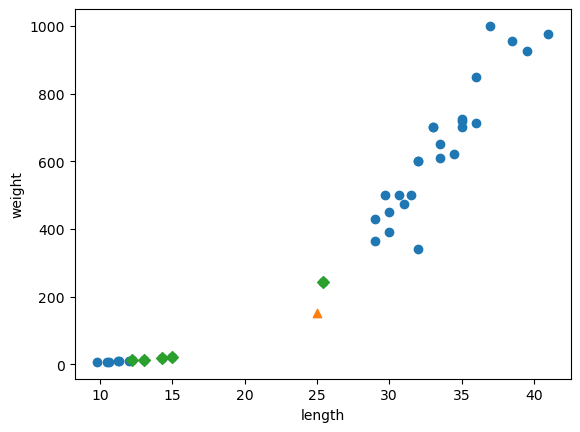

In [9]:
import matplotlib.pyplot as plt
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


plt로 관측한 결과 해당위치의 경우 K 최근접 알고리즘을 사용할경우 잘못 분류될 가능성이 있음

In [10]:
print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [11]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


따라서 기준점을 잡아서 해당 축 X선과 Y선 기점으로 어떤 생선으로 분류할지 판단지점을 생성해야함

In [12]:
train_scaled = (train_input - mean) / std

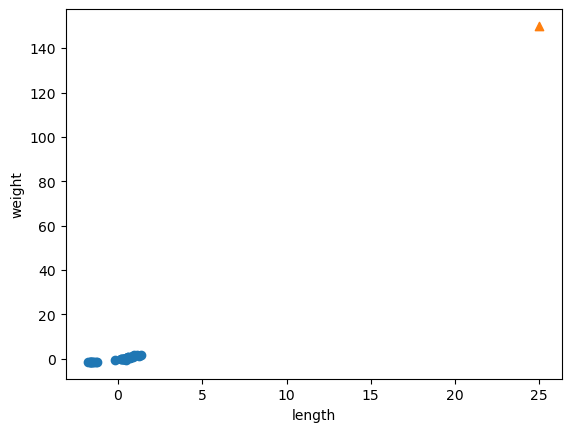

In [13]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

그 결과 해당 모형처럼 표현될 수 있음

In [14]:
kn.fit(train_scaled, train_target)
KNeighborsClassifier()
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

이번에 해당 모형을 반형하여 학습을 돌려봄 이후 결과를 표현하면 다음과 같음

In [15]:
new = ([25, 150] - mean) / std
print(kn.predict([new]))
distances, indexes = kn.kneighbors([new])

[1.]


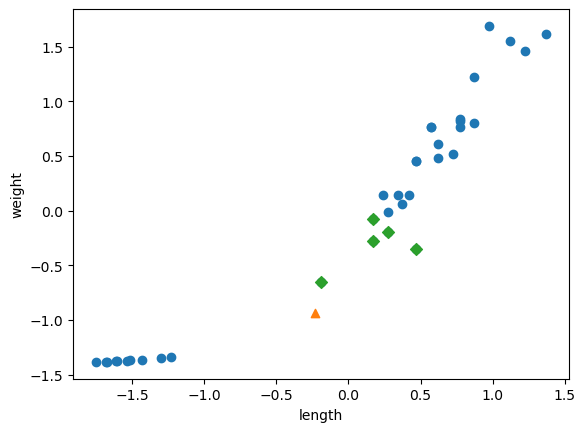

In [16]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

X, Y축을 기점으로 더이상 기준점 외쪽으로 K최근접 알고리즘이 작동하지 않는것을 확인할 수 있음